# Data Processing

## Imports & functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.metrics import r2_score

In [2]:
plt.style.use(['bmh'])
# plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
def show(fs, ns, title=""):
    plt.figure()
    
    for n in ns:
        df = pd.read_csv(f"{fs}{n}.csv")
        plt.plot(df.time, df.Pressure, label=f"Trial {n}")
        
    plt.legend()
    
    plt.ylabel("Gas pressure (kPa)")
    plt.xlabel("Time (s)")
    plt.title(title)


In [4]:
def rate(df, start, end):
    slope, *_ = linregress(df.time[start:end],
                           df.Pressure[start:end])
    return slope

In [5]:
def rates(fs, ns, start=100, end=201):
    dfs = [pd.read_csv(f"{fs}{n}.csv") for n in ns]
    rates = None
    min_sd = float('inf')
    for i in range(START, END):
        rates_ = []
        for df in dfs:
            if len(df.time[i:i + L]) < L:
                break
            rates_.append(rate(df, i, i + L))
        else:
            rates_ = pd.Series(rates_)
            if rates_.std() < min_sd:
                min_sd = rates_.std()
                rates = rates_
                start = i
            continue
        break
#     print(start)
    plt.axvline(dfs[0].time[start], linestyle='--', color='k')
    plt.axvline(dfs[0].time[start + L], linestyle='--', color='k')
    return rates

## Reaction rate curve

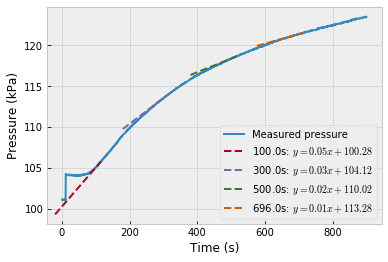

In [6]:
df = pd.read_csv("fe13.csv")
plt.figure()

plt.plot(df.time, df.Pressure, label="Measured pressure")
xlim_min, xlim_max = plt.gca().get_xlim()

for start in range(199, 1600, 385):
    slope, y_intercept, *_ = linregress(df.time[start:start + 31], df.Pressure[start:start + 31])
    xs = np.linspace(df.time[start] - 120, df.time[start + 31])
    ys = slope * xs + y_intercept
    plt.plot(xs, ys, '--', label="{}s: $y = {: .2f}x {:+.2f}$".format(df.time[start], slope, y_intercept))

plt.xlim(xlim_min, xlim_max)

# plt.title("Rate of decomposition of $\mathregular{H_2O_2}$ with the presence of $\mathregular{FeCl_3}$ catalyst")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (kPa)")

plt.legend()

plt.show()

## Reaction rates

In [7]:
L = 31
START = 121
END = 251

0    0.015602
1    0.048317
2    0.034653
3    0.019269
dtype: float64

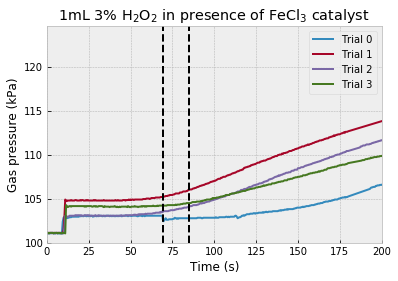

In [8]:
show("fe1", range(4), "1mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
plt.xlim(0, 200)
rates("fe1", range(4))

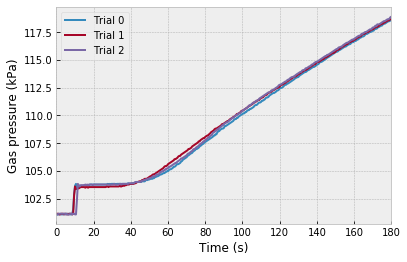

In [9]:
show("fe1half", range(3))

# plt.minorticks_on()
# plt.grid(b=True, which='both', linestyle='-')
plt.xlim(0, 180);

0    0.106860
1    0.104814
2    0.105718
dtype: float64

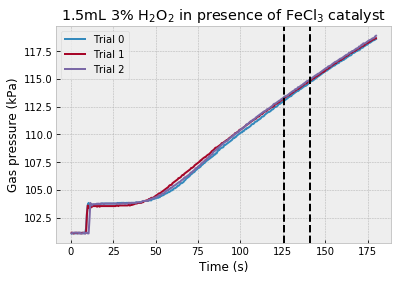

In [10]:
show("fe1half", range(3), "1.5mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe1half", range(3))

0    0.070827
1    0.038778
2    0.170672
3    0.107129
4    0.117541
dtype: float64

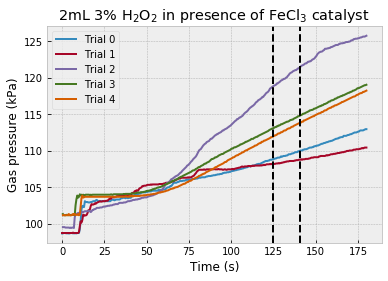

In [11]:
show("fe2", range(5), "2mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe2", range(5))

0    0.179741
1    0.201268
2    0.197579
dtype: float64

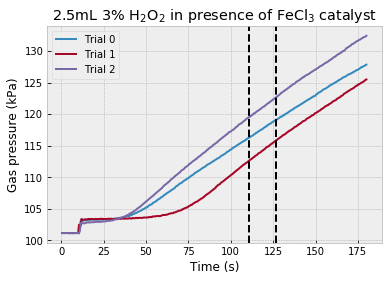

In [12]:
show("fe2half", range(3), "2.5mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe2half", range(3))

91.5


count    3.000000
mean     0.269031
std      0.005852
min      0.263956
25%      0.265830
50%      0.267704
75%      0.271568
max      0.275433
dtype: float64

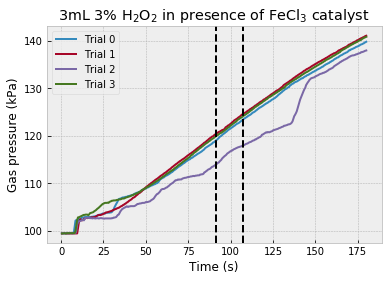

In [13]:
show("fe3", range(4), "3mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe3", range(4))
print(df.time[182])

data = []
for i in range(4):
    if i == 2:
        continue
    df = pd.read_csv(f"fe3{i}.csv")
    data.append((df.Pressure[182 + 30] - df.Pressure[182]) / 15)

pd.Series(data).describe()

0    0.297985
1    0.289392
2    0.286760
dtype: float64

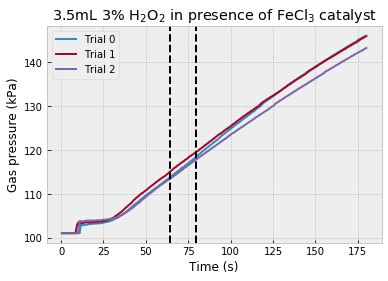

In [14]:
show("fe3half", range(3), "3.5mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe3half", range(3))

0    0.416594
1    0.450261
2    0.432270
dtype: float64

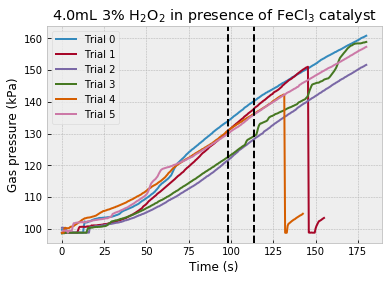

In [15]:
show("fe4", range(6), "4.0mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe4", range(3))

0    0.269284
1    0.263343
2    0.265134
3    0.231478
dtype: float64

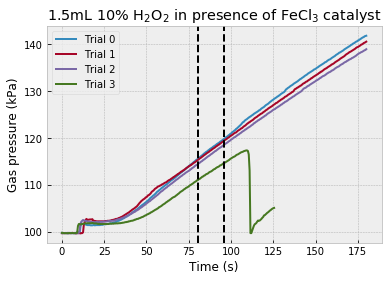

In [16]:
show("fe3%", range(4), "1.5mL 10% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe3%", range(4))

0    0.410789
1    0.583742
2    0.840005
3    0.540994
4    0.398926
dtype: float64

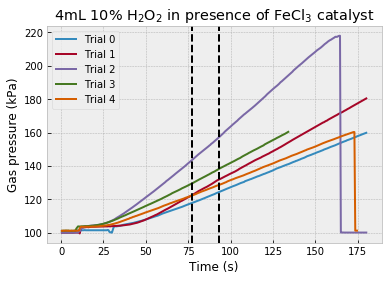

In [17]:
show("feconc", range(5), "4mL 10% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("feconc", range(5))

## Graphs

In [18]:
m_H2O2 = 3  # g
m_sol = 100  # g
rho_sol = 1.01  # g/cm^3

v_sol = m_sol / rho_sol  # cm^3
n_H2O2 = 3 / (1.01 * 2 + 16.00 * 2)

c_H2O2 = n_H2O2 / (v_sol/1000)
c_H2O2

0.8906525573192239

In [19]:
def xerr(v_h2o2, v_cat=1, v_total=5):
    v_h2o = v_total - v_h2o2 - v_cat
    perc_err = 0.05*2 / v_h2o2 + (0.05*2 + 0.05 + 0.05) / v_total
    val = v_h2o2 / v_total * c_H2O2
    return perc_err * val

0.9297485353560806
0.9601255165661694


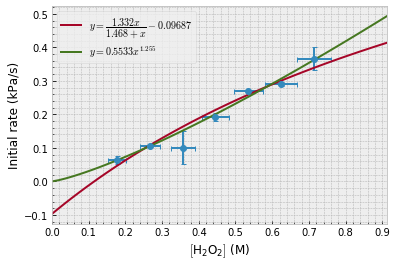

In [20]:
xs = []
ys = []
xerrs = []
yerrs = []

rs = rates("fe1", {1, 2, 3})
xs.append(c_H2O2 * 1.0/5)
ys.append(rs.mean())
xerrs.append(xerr(1.0))
yerrs.append(rs.std())

rs = rates("fe1half", {0, 1, 2})
xs.append(c_H2O2 * 1.5/5)
ys.append(rs.mean())
xerrs.append(xerr(1.5))
yerrs.append(rs.std())

rs = rates("fe2", {0, 1, 2, 3, 4})
xs.append(c_H2O2 * 2.0/5)
ys.append(rs.mean())
xerrs.append(xerr(2.0))
yerrs.append(rs.std())

rs = rates("fe2half", {0, 1, 2})
xs.append(c_H2O2 * 2.5/5)
ys.append(rs.mean())
xerrs.append(xerr(2.5))
yerrs.append(rs.std())

rs = rates("fe3", {0, 1, 2, 3})
xs.append(c_H2O2 * 3.0/5)
ys.append(rs.mean())
xerrs.append(xerr(3.0))
yerrs.append(rs.std())

rs = rates("fe3half", {0, 1, 2})
xs.append(c_H2O2 * 3.5/5)
ys.append(rs.mean())
xerrs.append(xerr(3.5))
yerrs.append(rs.std())


rs = rates("fe4", {0, 1, 2, 3, 4, 5})
xs.append(c_H2O2 * 4.0/5)
ys.append(rs.mean())
xerrs.append(xerr(4.0))
yerrs.append(rs.std())

# rs = rates("fe3%", {0, 1, 2, 3})
# xs.append(10 * 1.5/5)
# ys.append(rs.mean())
# xerrs.append(xerr(1.5))
# yerrs.append(rs.std())

# rs = rates("feconc", {0, 1, 2, 3, 4})
# xs.append(10 * 4.0/5)
# ys.append(rs.mean())
# xerrs.append(xerr(4.0))
# yerrs.append(rs.std())

# To molar concentration
xs = np.array(xs)
ys = np.array(ys)
xerrs = np.array(xerrs)
yerrs = np.array(yerrs)

# xs *= 1.44 / 34.02 * 1 / (1 + 1.44 / (1.00 * 3/100))
# xerrs *= 1.44 / 34.02 * 1 / (1 + 1.44 / (1.00 * 3/100))

plt.close()


plt.errorbar(x=xs, y=ys, xerr=xerrs, yerr=yerrs, 
             fmt='o', capsize=2.5)

b = -0.09687
k_m = 1.468
v_max = 1.332

k = 0.5533
a = 1.255

xlim_min, xlim_max = plt.gca().get_xlim()
r2 = r2_score(ys, v_max * xs / (k_m + xs) + b)
print(r2)

r2_ = r2_score(ys, k * xs**a)
print(r2_)

xs_ = np.linspace(0, xlim_max + xlim_min)
plt.plot(xs_, v_max * xs_ / (k_m + xs_) + b, 
         label=rf"$y = \dfrac{{{v_max} x}}{{{k_m} + x}} {b}$")
plt.plot(xs_, k * xs_**a, 
         label=rf"$y = {k} x^{{{a}}}$", color='C3')
plt.xlim(0, xlim_max + xlim_min)

plt.xlabel("$[\mathregular{H_2O_2}]$ (M)")
plt.ylabel("Initial rate (kPa/s)")
# plt.title("$\mathregular{FeCl_3}$–catalysed decomposition of $\mathregular{H_2O_2}$")

plt.minorticks_on()
plt.gca().get_xaxis().set_major_locator(plt.MaxNLocator(10))
plt.grid(which='minor')

plt.legend()

plt.savefig('processed_data.png', dpi=300)
plt.show()